#    # Importing the Dataset

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [52]:
df=pd.read_csv('HR_Attrition_Rate.csv',delimiter='\t')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Checking Null Values

In [53]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [54]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# DataFrame Description

#The datset contains the data of Employees efficiency,working details. On the basis of the data we have to predict the Attrition rate. The dataset contains the data like Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance'.

So we are going find out ouput prediction as Attirition means number of employee who left the company and the number of employees who stayed back.
       

# Exploratory Data Analysis

# Checking the datatypes of the columns

In [55]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Statistical Analysis

In [56]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


So what we infer from the statistical analysis is in Age column the minimum aga is 18 and the maximum age is 60,maximum hourly late is 100,and minimum hourly late is 30.Mean hourly late is 65.89

Since our prediction is find the number of employees who left and company and number of employees who stayed back,lets take the count of 'Attrition'.

In [57]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

so we find 137 employess left the company and 1233 employees stayed back at the company.so lets see this markings in visualization.

# Data Visualization 

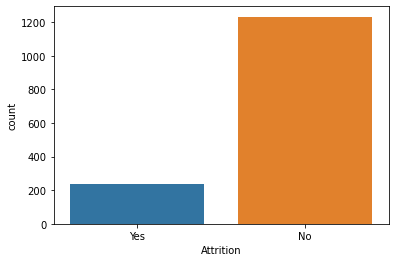

In [58]:
sns.countplot(df['Attrition'])
plt.show()

so lets find the number of employees  left and stayed back according to thier age.

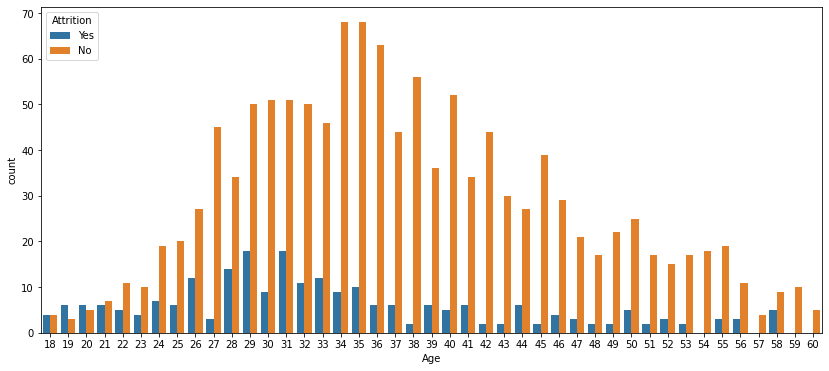

In [59]:
plt.subplots(figsize=(14,6))
sns.countplot(x='Age',hue='Attrition',data=df)
plt.show()

So if the person is 34 or 35 age is currently employed, and  age of 29 and 31 left the company.

# Getting data types and unique values.

In [60]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


Now we can the unique vales according to the department wise and category wise.
in  column age 'under 18' has only one unique value so we can drop that column.

# Data Preprocessing

We shall remove some columns that dont give much information to the data.Like the coulmns,'Employee Number','Standard Hours' thier work and 'EmployeeCount'in the department they work.

In [61]:
df = df.drop('Over18',axis=1)
df = df.drop('EmployeeNumber',axis=1)
df = df.drop('StandardHours',axis=1)
df = df.drop('EmployeeCount',axis=1) 

# Correlation 

In [62]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


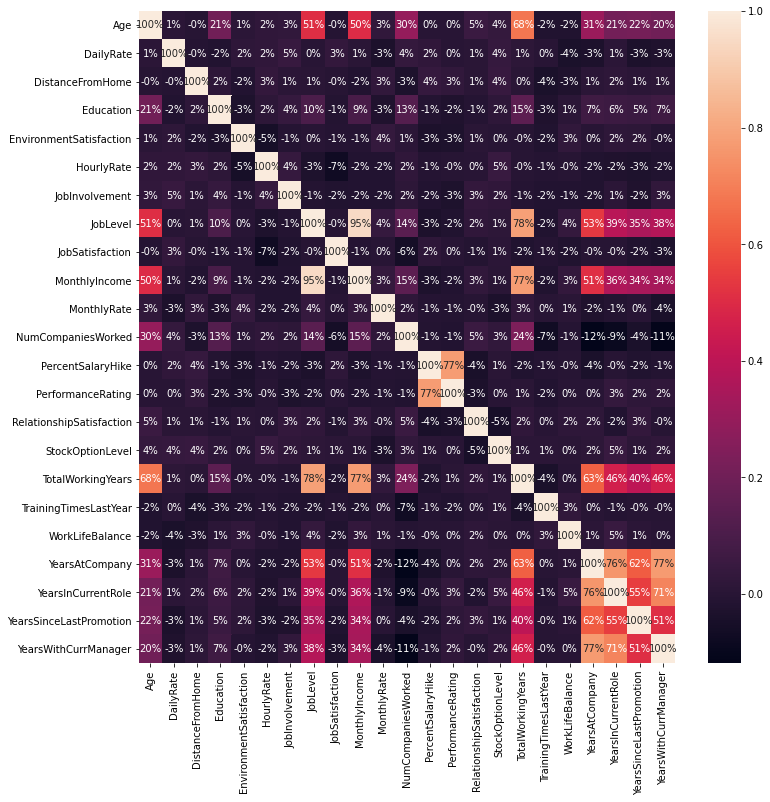

In [63]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%')
plt.show()

We have positive correlation in the Age column of 68% with total working years,so the longer time you are working in the job you will get the expierence you get more,the job level has 78% correlation with total working years,so the longer we work at a job higher our value of expierence is,Also the monthly income is 77% correlation with total working years,so more nmber os expierence we git huge salary,so we can see the monthly income as 95% with the more expierence at job level.

# Transformation of the data 

we are going transform and categorical and the object type column for our model purpose.

In [64]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

We are going to drop the age column because we need Attrition as the first column

In [65]:
df['Age_Years']=df['Age']

Now,we can drop the age column,because we have created a column with age and years.
Also why we did this is we need Attrition column to be first since it will be useful when we split the data.

In [66]:
df=df.drop('Age',axis=1)

now we can see Attrition column as first column.

In [67]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


# Train Test Splitting the Data

we are splitting the data for training and testing as 75% training and 25% testing.

In [68]:
x=df.iloc[:,1:df.shape[1]].values
y=df.iloc[:,0].values

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# GaussianNB

In [70]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8070652173913043
[[261  49]
 [ 22  36]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       310
           1       0.42      0.62      0.50        58

    accuracy                           0.81       368
   macro avg       0.67      0.73      0.69       368
weighted avg       0.84      0.81      0.82       368



In [71]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.842391304347826
[[310   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



# Decision Tree Classifier

In [72]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7989130434782609
[[278  32]
 [ 42  16]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       310
           1       0.33      0.28      0.30        58

    accuracy                           0.80       368
   macro avg       0.60      0.59      0.59       368
weighted avg       0.78      0.80      0.79       368



# kneighbors Classifier

In [111]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8179347826086957
[[298  12]
 [ 55   3]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       310
           1       0.20      0.05      0.08        58

    accuracy                           0.82       368
   macro avg       0.52      0.51      0.49       368
weighted avg       0.74      0.82      0.77       368



In [74]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.842391304347826
[[310   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



In [75]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.842391304347826
[[310   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



In [76]:
svmkernel('rbf')

In [77]:
svmkernel('poly')

#  Ensemble Techniques-Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [79]:
forest.score(x_train,y_train)

0.9791288566243194

# Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,forest.predict(x_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print('Model Testing Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[309   1]
 [ 49   9]]
Model Testing Accuracy=0.8641304347826086


Model is 86.4% better on Test data.So our guessing 80% attrition of the Employee staying at the company.

In [81]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
predm=DecisionTreeClassifier()
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predem=m.predict(x_test)
    print('Accuracy score of',m,'is')
    print(accuracy_score(y_test,predem))
    print(confusion_matrix(y_test,predem))
    print(classification_report(y_test,predem))
    print('\n')

Accuracy score of DecisionTreeClassifier() is
0.7934782608695652
[[275  35]
 [ 41  17]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       310
           1       0.33      0.29      0.31        58

    accuracy                           0.79       368
   macro avg       0.60      0.59      0.59       368
weighted avg       0.78      0.79      0.79       368



Accuracy score of SVC() is
0.842391304347826
[[310   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



Accuracy score of KNeighborsClassifier() is
0.8179347826086957
[[298  12]
 [ 55   3]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90  

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
gnbscores = cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(), gnbscores.std())

[0.82653061 0.80272109 0.76190476 0.78911565 0.80612245]
0.7972789115646258 0.021360977507629386


In [83]:
svcscores = cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
0.8387755102040817 0.0016663195529137286


In [84]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.7755102  0.80272109 0.80612245 0.75170068 0.81292517]
0.789795918367347 0.0229081064496364


# Saving the best model

# Conclusion:

In [107]:
import pickle

filename='pickledfile2.pkl'
pickle.dump(knn,open(filename,'wb'))

#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# Hyper Parameter Tuning

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [87]:
from sklearn import svm, datasets

from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

clf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [88]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [89]:
sv=svm.SVC(kernel='poly',C=1)
sv.fit(x,y)
t=sv.score(x,y)
print(round(t,2))

0.84


In [90]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()
iris=datasets.load_iris()

grid_param={'criterion':['gini','entropy']
           }

#gridk={'kernel':['linear','rbf','poly']}

gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(iris.data,iris.target)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'gini'}
0.9600000000000002


# AUC ROC CURVE

In [91]:
from  sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [94]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [95]:
y_pred_prob

array([0.6, 0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0. , 0. , 0.4, 0.2,
       0. , 0. , 0. , 0.2, 0.4, 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.4, 0. ,
       0. , 0. , 0.4, 0. , 0.2, 0.4, 0. , 0.4, 0. , 0. , 0.2, 0.2, 0.4,
       0.4, 0. , 0.2, 0.2, 0.6, 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.2,
       0.2, 0.2, 0. , 0. , 0.2, 0.2, 0.2, 0. , 0.2, 0. , 0. , 0. , 0.2,
       0.2, 0.2, 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0. ,
       0.2, 0. , 0.2, 0. , 0.2, 0.4, 0.4, 0.2, 0. , 0.4, 0. , 0. , 0.2,
       0.2, 0.2, 0.6, 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0.2,
       0.2, 0. , 0. , 0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0.2,
       0. , 0. , 0.4, 0. , 0.4, 0. , 0.6, 0.2, 0. , 0. , 0. , 0. , 0.2,
       0. , 0.4, 0.4, 0. , 0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ,
       0. , 0.2, 0. , 0.4, 0. , 0. , 0. , 0.2, 0. , 0.2, 0.2, 0. , 0. ,
       0. , 0.4, 0.6, 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0.2, 0. , 0. ,
       0. , 0.2, 0. , 0. , 0. , 0. , 0.2, 0.2, 0. , 0.4, 0. , 0.

In [97]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [98]:
fpr

array([0.        , 0.00645161, 0.03870968, 0.16129032, 0.50645161,
       1.        ])

In [99]:
tpr

array([0.        , 0.01724138, 0.05172414, 0.25862069, 0.56896552,
       1.        ])

In [100]:
thresholds

array([1.8, 0.8, 0.6, 0.4, 0.2, 0. ])

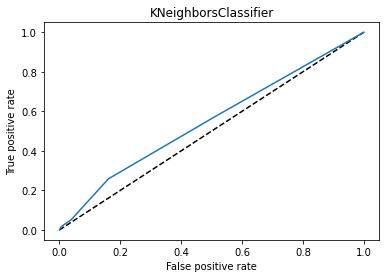

In [101]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

In [104]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))

In [105]:
print(auc_score)

0.5065072302558398


Usually, the AUC is in the range [0.5,1] because useful classifiers should perform better than random. In principle, however, the AUC can also be smaller than 0.5, 